**EDA**

In [2]:
!pip install pycaret

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

*Explore the data*

In [4]:
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

In [5]:
train_df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [6]:
train_df.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

In [7]:
train_df.shape

(58645, 13)

In [8]:
train_df.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [10]:
number_of_loan_accepted = train_df['loan_status'].value_counts()
print(number_of_loan_accepted)

loan_status
0    50295
1     8350
Name: count, dtype: int64


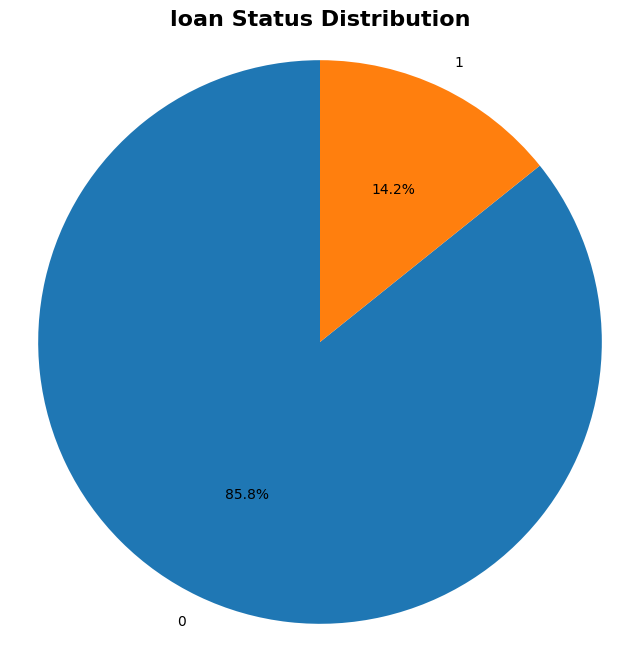

In [11]:
def pie_plot(data, plot_title):
  # Create the pie chart
  plt.figure(figsize=(8, 8))
  plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90)
  plt.title(plot_title, fontsize=16, fontweight='bold')
  plt.axis('equal')

  # Display the chart
  plt.show()
pie_plot(train_df["loan_status"].value_counts(),
         plot_title="loan Status Distribution")

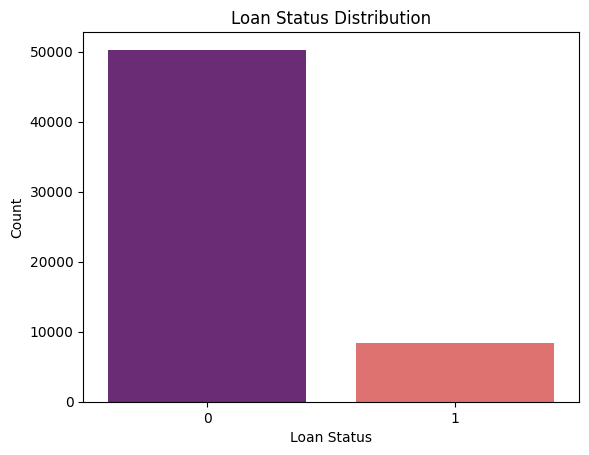

In [12]:
sns.countplot(x='loan_status', data=train_df, palette="magma")
plt.title("Loan Status Distribution")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()


This chart shows a significant class imbalance in `loan_status`, with far more instances of class `0` than class `1`. Addressing this imbalance will be important for improving model accuracy on the minority class.

In [13]:
train_df['loan_intent']

,loan_intent
0,EDUCATION
1,MEDICAL
2,PERSONAL
3,VENTURE
4,MEDICAL
...,...
58640,EDUCATION
58641,MEDICAL
58642,EDUCATION
58643,EDUCATION


In [14]:
train_df['loan_intent'] = train_df['loan_intent'].astype('category')
loan_intent_counts = train_df['loan_intent'].value_counts()
loan_intent_percentages = (loan_intent_counts / loan_intent_counts.sum()) * 100

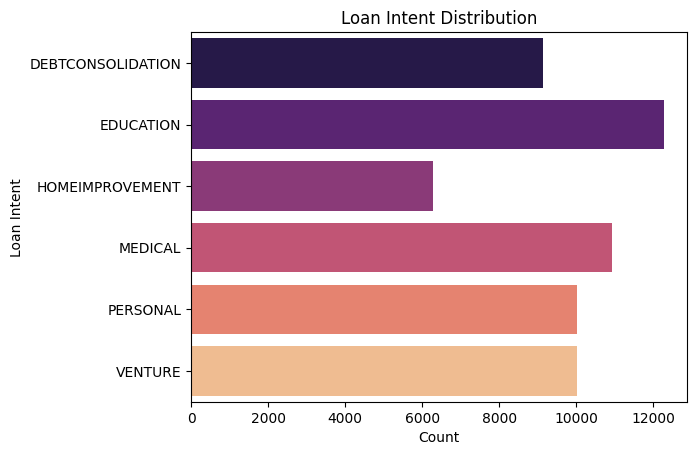

In [15]:
sns.barplot(x=loan_intent_counts.values, y=loan_intent_counts.index, palette="magma")
plt.title("Loan Intent Distribution")
plt.xlabel("Count")
plt.ylabel("Loan Intent")
plt.show()

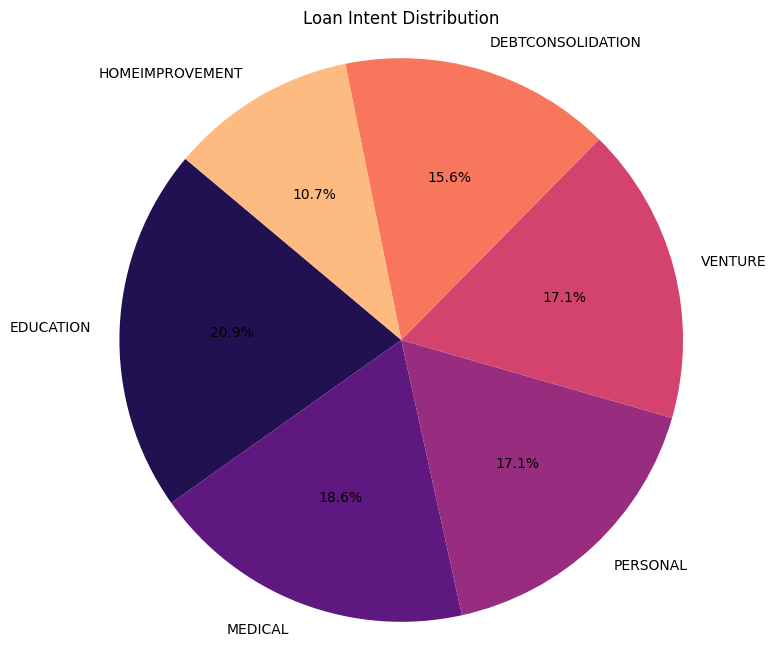

In [16]:
plt.figure(figsize=(8, 8))
custom_colors = sns.color_palette("magma", n_colors=len(loan_intent_percentages))
plt.pie(
    loan_intent_percentages,
    labels=loan_intent_percentages.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=custom_colors
)
plt.axis('equal')
plt.title("Loan Intent Distribution")
plt.show()

In [17]:
train_df["person_age"] = train_df["person_age"].astype('int64')

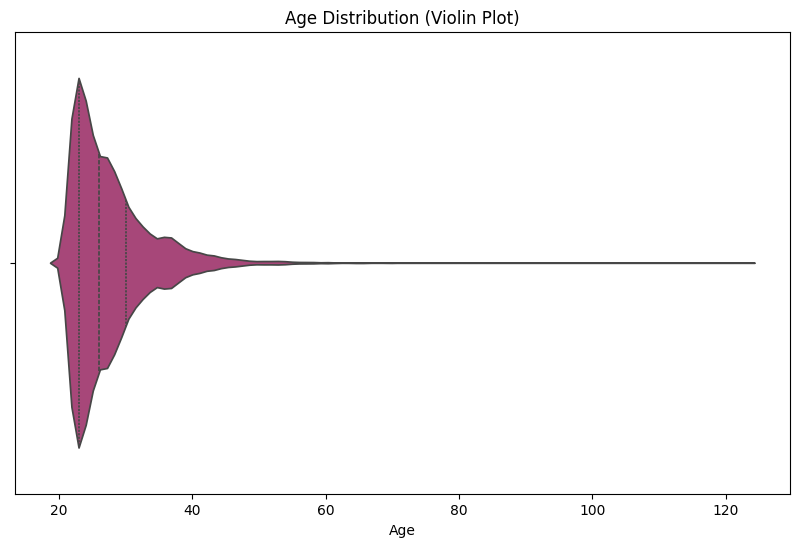

In [18]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=train_df["person_age"], inner="quartile", palette="magma")
plt.title("Age Distribution (Violin Plot)")
plt.xlabel("Age")
plt.show()

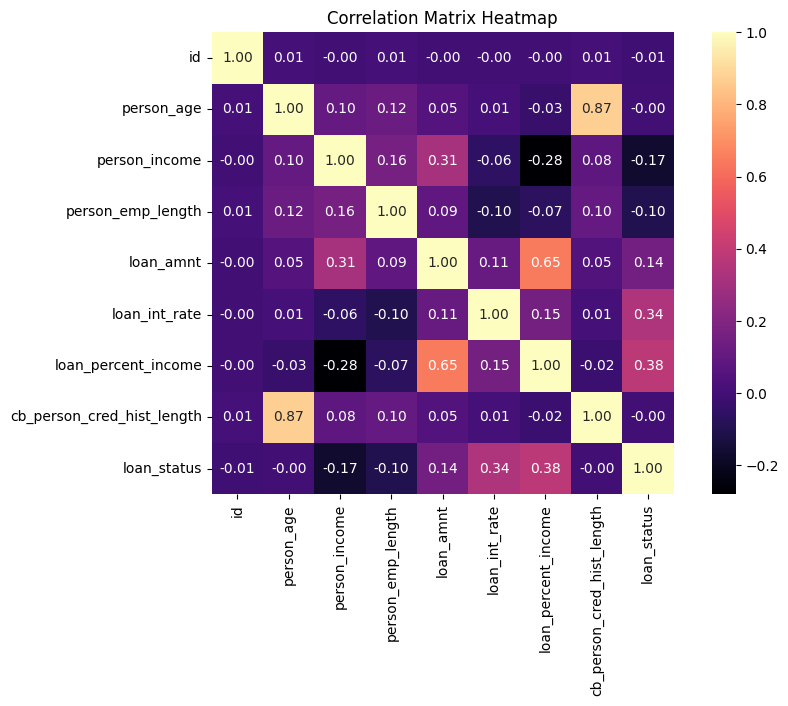

In [19]:
numeric_cols = train_df.select_dtypes(include='number')
correlation_matrix = numeric_cols.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='magma', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

*Applicant Income vs.Loan Amount*

In [20]:
train_df.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')

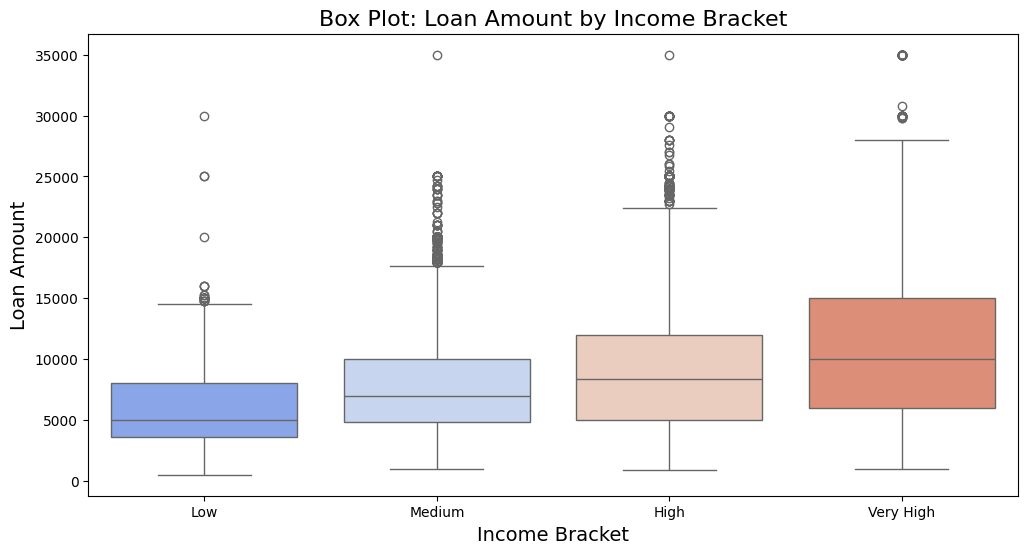

In [21]:
plt.figure(figsize=(12, 6))

# Create income brackets for the box plot
train_df['income_bracket'] = pd.cut(train_df['person_income'], bins=[0, 30000, 50000, 70000, 90000],
                                      labels=['Low', 'Medium', 'High', 'Very High'])

# Create a box plot
sns.boxplot(data=train_df, x='income_bracket', y='loan_amnt', palette='coolwarm')

# Add labels and title
plt.xlabel('Income Bracket', fontsize=14)
plt.ylabel('Loan Amount', fontsize=14)
plt.title('Box Plot: Loan Amount by Income Bracket', fontsize=16)

# Show the plot
plt.show()


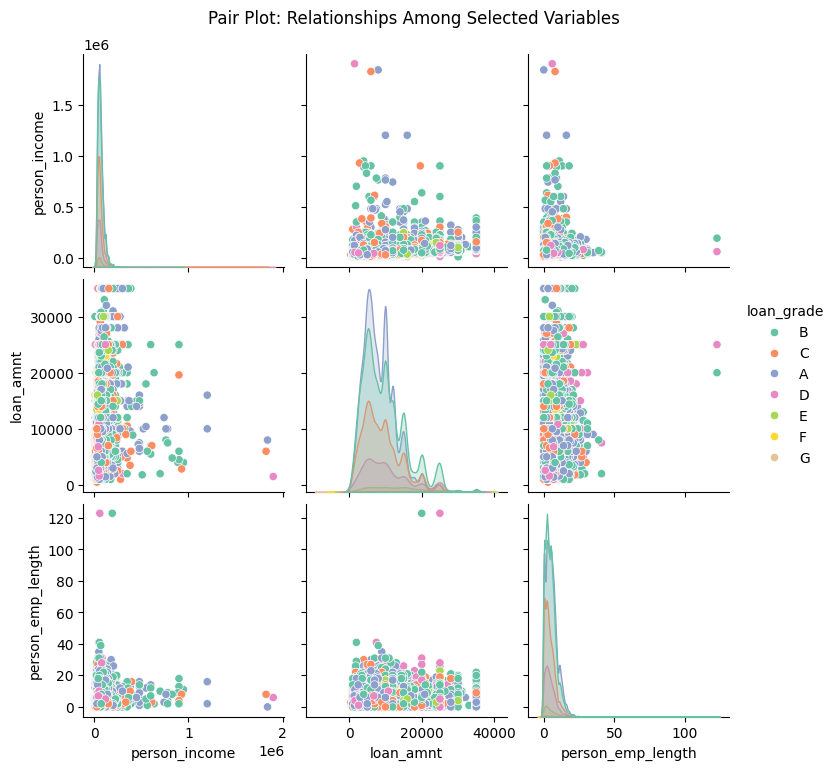

In [22]:
# Create a pair plot to visualize relationships
sns.pairplot(train_df, vars=['person_income', 'loan_amnt', 'person_emp_length'], hue='loan_grade', palette='Set2')

# Show the plot
plt.suptitle('Pair Plot: Relationships Among Selected Variables', y=1.02)
plt.show()


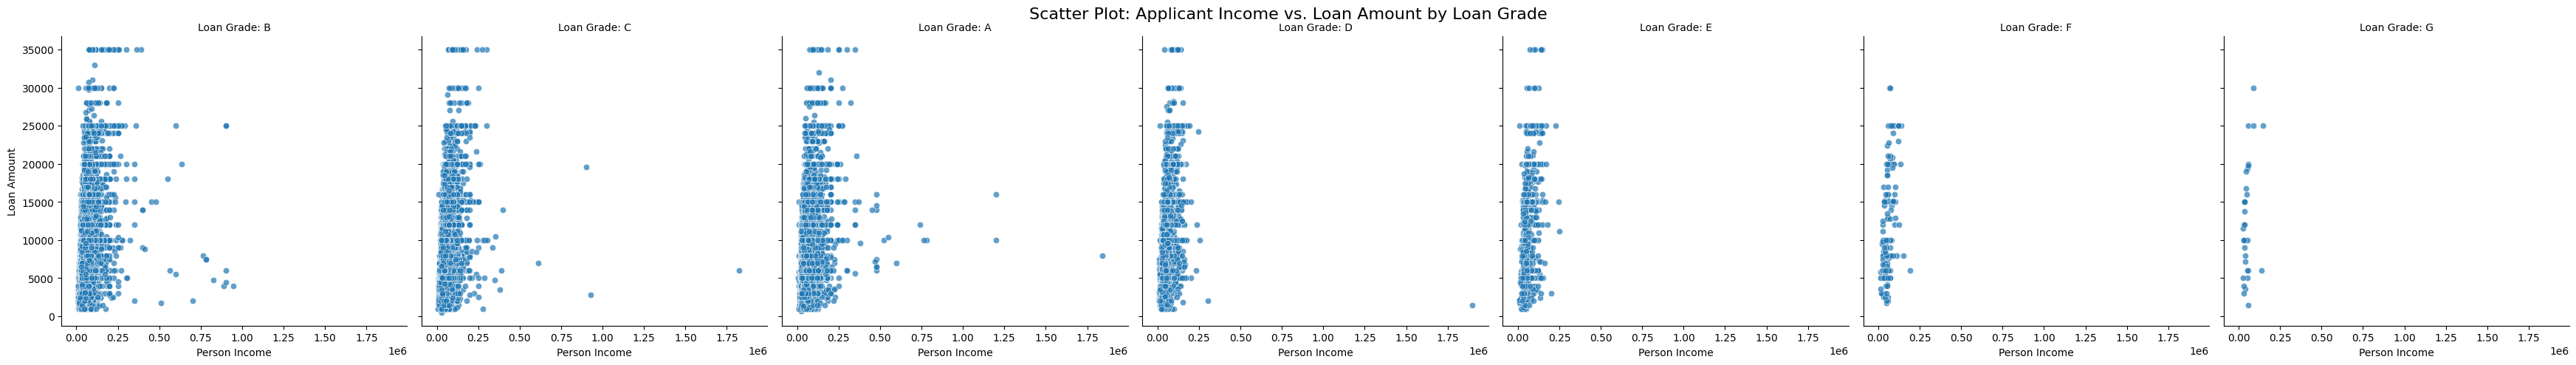

In [23]:
g = sns.FacetGrid(train_df, col='loan_grade', height=5, aspect=1)
g.map(sns.scatterplot, 'person_income', 'loan_amnt', alpha=0.7)

# Add titles
g.set_titles(col_template='Loan Grade: {col_name}')
g.set_axis_labels('Person Income', 'Loan Amount')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Scatter Plot: Applicant Income vs. Loan Amount by Loan Grade', fontsize=16)

# Show the plot
plt.show()


In [24]:
train_df.columns

Index(['id', 'person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status', 'income_bracket'],
      dtype='object')

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [26]:
# Handle missing values if necessary
train_df.fillna(method='ffill', inplace=True)

In [27]:
train_df = pd.get_dummies(train_df, columns=['loan_intent', 'loan_grade'], drop_first=True)

In [28]:
train_df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,...,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
0,0,37,35000,RENT,0.0,6000,11.49,0.17,N,14,...,False,False,False,False,True,False,False,False,False,False
1,1,22,56000,OWN,6.0,4000,13.35,0.07,N,2,...,False,True,False,False,False,True,False,False,False,False
2,2,29,28800,OWN,8.0,6000,8.90,0.21,N,10,...,False,False,True,False,False,False,False,False,False,False
3,3,30,70000,RENT,14.0,12000,11.11,0.17,N,5,...,False,False,False,True,True,False,False,False,False,False
4,4,22,60000,RENT,2.0,6000,6.92,0.10,N,3,...,False,True,False,False,False,False,False,False,False,False


In [29]:
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = train_df.select_dtypes(include=['object']).columns

In [30]:
# Create an imputer for numerical columns
num_imputer = SimpleImputer(strategy='mean')

# Create an imputer for categorical columns
cat_imputer = SimpleImputer(strategy='most_frequent')

In [31]:
# Apply the imputers
train_df[numerical_cols] = num_imputer.fit_transform(train_df[numerical_cols])
train_df[categorical_cols] = cat_imputer.fit_transform(train_df[categorical_cols])

# Feature Engineering


In [32]:
# Create income brackets for the 'person_income' variable
train_df['income_bracket'] = pd.cut(train_df['person_income'], bins=[0, 30000, 50000, 70000, 90000],
                                      labels=['Low', 'Medium', 'High', 'Very High'])

In [33]:
# Create interaction terms (for demonstration, you can create other combinations)
train_df['income_emp_length'] = train_df['person_income'] * train_df['person_emp_length']

# Normalization/Standardization

In [34]:
# Initialize a scaler for numerical features
scaler = StandardScaler()

# Apply scaling to numerical features
train_df[numerical_cols] = scaler.fit_transform(train_df[numerical_cols])

# Encoding Categorical Variables

In [35]:
# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),   # Scale numerical features
        ('cat', OneHotEncoder(), categorical_cols)    # One-hot encode categorical features
    ])

# Train-Test Split

In [36]:
# X = train_df.drop('loan_status', axis=1)  # Features
# y = train_df['loan_status']                 # Target variable
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
X.head()

NameError: name 'X' is not defined

In [42]:
from pycaret.classification import *
from pycaret.classification import setup, compare_models, evaluate_model, predict_model, save_model, load_model

In [41]:
train_df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
58640,34,120000,MORTGAGE,5.0,EDUCATION,D,25000,15.95,0.21,Y,10,0
58641,28,28800,RENT,0.0,MEDICAL,C,10000,12.73,0.35,N,8,1
58642,23,44000,RENT,7.0,EDUCATION,D,6800,16.00,0.15,N,2,1
58643,22,30000,RENT,2.0,EDUCATION,A,5000,8.90,0.17,N,3,0


In [44]:
# Reload the dataset to ensure all columns are present, if needed
train_df = pd.read_csv('/content/train.csv')  # Adjust this path to your dataset

# Drop the 'id' column if present
if 'id' in train_df.columns:
    train_df.drop(columns=['id'], inplace=True)

# Convert categorical columns with multiple categories into dummy variables
train_df = pd.get_dummies(train_df, columns=['loan_intent', 'loan_grade'], drop_first=True)

# Set the remaining categorical features to 'category' type
categorical_features = ['person_home_ownership', 'cb_person_default_on_file']
for feature in categorical_features:
    train_df[feature] = train_df[feature].astype('category')

# Drop 'income_bracket' if not needed
if 'income_bracket' in train_df.columns:
    train_df.drop(columns=['income_bracket'], inplace=True)

# Now set up PyCaret environment with `loan_status` as the target
clf = setup(data=train_df, target='loan_status', session_id=42,
             normalize=True,
             categorical_features=categorical_features,
             numeric_features=['person_age', 'person_income', 'person_emp_length',
                              'loan_amnt', 'loan_int_rate', 'loan_percent_income',
                              'cb_person_cred_hist_length'])

,Description,Value
0,Session id,42
1,Target,loan_status
2,Target type,Binary
3,Original data shape,"(58645, 21)"
4,Transformed data shape,"(58645, 24)"
5,Transformed train set shape,"(41051, 24)"
6,Transformed test set shape,"(17594, 24)"
7,Numeric features,7
8,Categorical features,2
9,Preprocess,True


In [45]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9517,0.9549,0.7191,0.9256,0.8092,0.7821,0.7904,1.6950
xgboost,Extreme Gradient Boosting,0.9509,0.9512,0.7328,0.9046,0.8095,0.7817,0.7875,0.5390
rf,Random Forest Classifier,0.9502,0.9339,0.7086,0.9240,0.8020,0.7740,0.7830,3.6320
gbc,Gradient Boosting Classifier,0.9458,0.9398,0.6910,0.9064,0.7838,0.7535,0.7628,4.2080
et,Extra Trees Classifier,0.9451,0.9186,0.6900,0.9013,0.7815,0.7507,0.7596,2.9410
knn,K Neighbors Classifier,0.9353,0.8790,0.6436,0.8678,0.7390,0.7030,0.7133,1.8850
ada,Ada Boost Classifier,0.9247,0.9202,0.6181,0.8078,0.7002,0.6580,0.6658,1.2740
lr,Logistic Regression,0.9123,0.9006,0.5335,0.7817,0.6338,0.5861,0.6001,0.9620
dt,Decision Tree Classifier,0.9099,0.8257,0.7080,0.6752,0.6910,0.6383,0.6387,0.3500
svm,SVM - Linear Kernel,0.9079,0.8877,0.5371,0.7475,0.6228,0.5721,0.5835,0.2810


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [46]:
tuned_lightgbm = tune_model(best_model)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9530,0.9556,0.7231,0.9317,0.8142,0.7878,0.7961
1,0.9474,0.9490,0.7003,0.9089,0.7911,0.7616,0.7700
2,0.9510,0.9547,0.7175,0.9209,0.8065,0.7790,0.7870
3,0.9498,0.9468,0.7226,0.9056,0.8038,0.7755,0.7819
4,0.9464,0.9468,0.6866,0.9155,0.7847,0.7548,0.7650
5,0.9491,0.9588,0.7312,0.8914,0.8034,0.7745,0.7795
6,0.9540,0.9540,0.7197,0.9439,0.8167,0.7909,0.8004
7,0.9525,0.9566,0.7248,0.9258,0.8130,0.7863,0.7940
8,0.9513,0.9513,0.7009,0.9425,0.8039,0.7768,0.7879


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


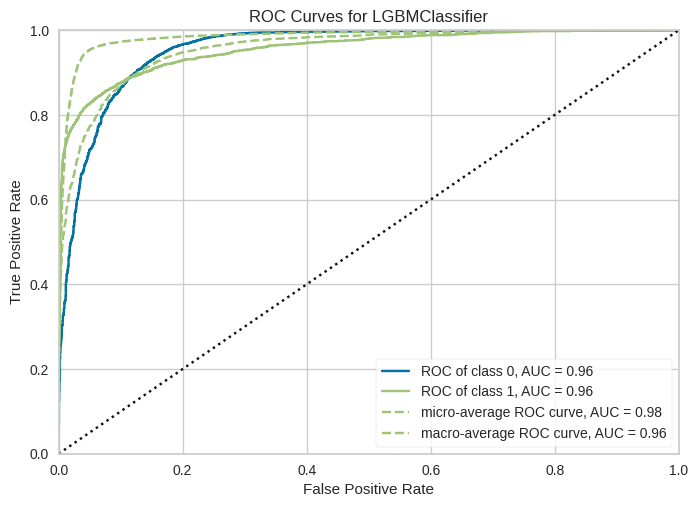

In [48]:
plot_model(tuned_lightgbm, plot='auc')  # AUC curve

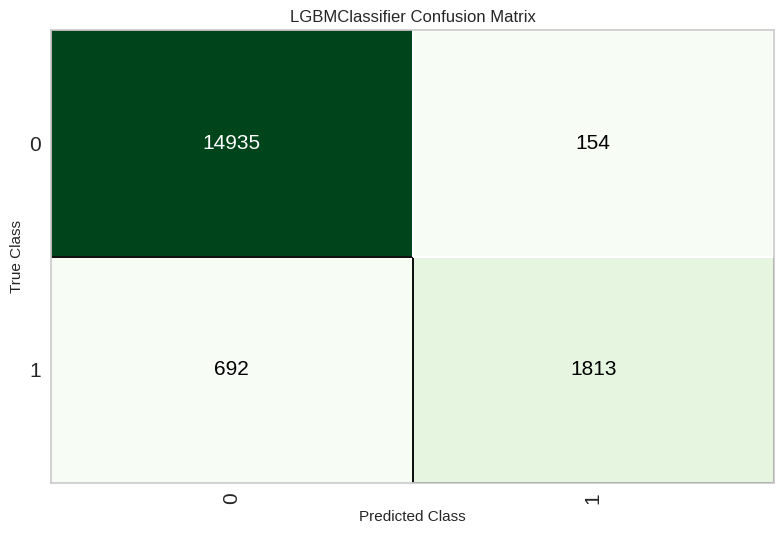

In [49]:
plot_model(tuned_lightgbm, plot='confusion_matrix')  # Confusion matrix

In [50]:
final_lightgbm = finalize_model(tuned_lightgbm)

In [56]:
final_lightgbm

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['person_age', 'person_income',
                                             'person_emp_length', 'loan_amnt',
                                             'loan_int_rate',
                                             'loan_percent_income',
                                             'cb_person_cred_hist_length'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=n...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_leaves=31, objective=None, random_state=42,
                                reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
                                subsample_for_bin=200000, subsample_freq=0))],
         verbose=False)

In [57]:
test_df = pd.read_csv('/content/test.csv')

In [59]:
test_df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status,...,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
0,23,69000,RENT,3.0,25000,15.76,0.36,N,2,0,...,0,0,0,0,0,0,0,0,0,0
1,26,96000,MORTGAGE,6.0,10000,12.68,0.10,Y,4,0,...,0,0,0,0,0,0,0,0,0,0
2,26,30000,RENT,5.0,4000,17.19,0.13,Y,2,0,...,0,0,0,0,0,0,0,0,0,0
3,33,50000,RENT,4.0,7000,8.90,0.14,N,7,0,...,0,0,0,0,0,0,0,0,0,0
4,26,102000,MORTGAGE,8.0,15000,16.32,0.15,Y,4,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
# Step 1: Check if columns in train_df are in test_df and add missing columns
for col in train_df.columns:
    if col not in test_df.columns:
        test_df[col] = 0

In [63]:
# Step 2: Ensure the columns are in the same order as train_df
test_df = test_df[train_df.columns]


In [65]:
tuned_model = tune_model(final_lightgbm)
tuned_predictions = predict_model(tuned_model, data=test_df)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9530,0.9556,0.7231,0.9317,0.8142,0.7878,0.7961
1,0.9474,0.9490,0.7003,0.9089,0.7911,0.7616,0.7700
2,0.9510,0.9547,0.7175,0.9209,0.8065,0.7790,0.7870
3,0.9498,0.9468,0.7226,0.9056,0.8038,0.7755,0.7819
4,0.9464,0.9468,0.6866,0.9155,0.7847,0.7548,0.7650
5,0.9491,0.9588,0.7312,0.8914,0.8034,0.7745,0.7795
6,0.9540,0.9540,0.7197,0.9439,0.8167,0.7909,0.8004
7,0.9525,0.9566,0.7248,0.9258,0.8130,0.7863,0.7940
8,0.9513,0.9513,0.7009,0.9425,0.8039,0.7768,0.7879


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8510,0,0.0000,0.0000,0.0000,0.0000,0.0000


In [54]:
test_df_encoded = test_df_encoded.reindex(columns=test_df.columns, fill_value=0)


In [55]:
predictions = predict_model(final_lightgbm, data=test_df_encoded)


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8925,0,0.0000,0.0000,0.0000,0.0000,0.0000


In [1]:
!pip install lightgbm

In [3]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [4]:
# Split your data into training and testing sets
X = train_df.drop('loan_status', axis=1)
y = train_df['loan_status']

NameError: name 'train_df' is not defined